# Imports

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, RandomZoom, RandomRotation, BatchNormalization, Dropout, Rescaling
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
import pathlib
from utils import process_path, LivePlot

In [2]:
%matplotlib inline

# Load MNIST Data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# Define Architecture

In [4]:
_input = Input(shape=(28, 28, 1))
normalized = Rescaling(1./255)(_input)

random_zoom = RandomZoom(
    height_factor=(-0.4, 0.1),
    width_factor=(-0.4, 0.1),
    fill_mode='constant',
    interpolation='bilinear',
    seed=None,
    fill_value=0.0
)(normalized)

random_rotation = RandomRotation(
    factor=.05,
    fill_mode='constant',
    interpolation='bilinear',
    seed=None,
    fill_value=0.0,
)(random_zoom)

# Feature Extraction
x = Conv2D(32, kernel_size=3, activation='relu', padding='same')(random_rotation)
x = BatchNormalization()(x)
x = Conv2D(32, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Dropout(0.25)(x)

# Block 2
x = Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Dropout(0.25)(x)

# Block 3
x = Conv2D(128, kernel_size=3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=2)(x)
x = Dropout(0.4)(x)

# Block 4
x = Conv2D(128, kernel_size=3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=2)(x)
x = Dropout(0.4)(x)

# Use extracted features in FCN
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(10)(x)

In [5]:
model = Model(inputs=_input, outputs=output)

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 305,642 (1.17 MB)

 Trainable params: 304,938 (1.16 MB)

 Non-trainable params: 704 (2.75 KB)

In [7]:
# use sparse categorical cross entropy loss since targets are not one hot encoded
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train Model

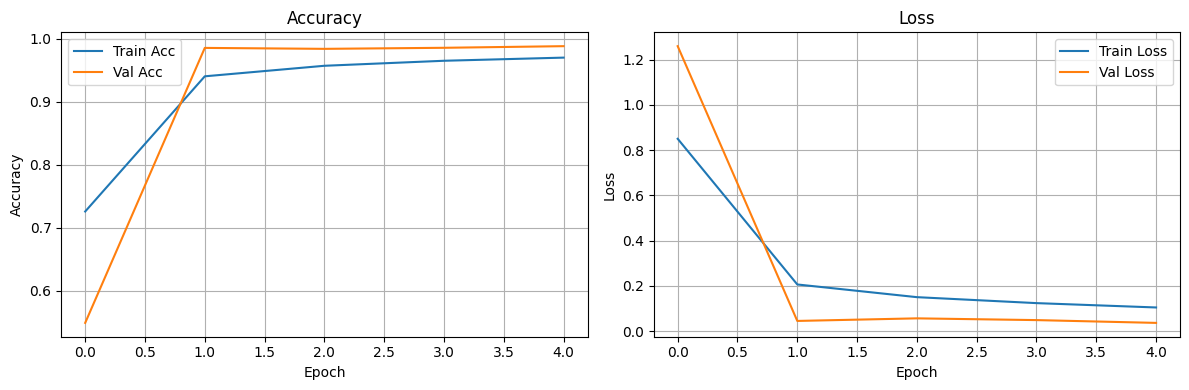

375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9691 - loss: 0.1095 - val_accuracy: 0.9883 - val_loss: 0.0368


In [8]:
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss")
model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=128, callbacks=[checkpoint, LivePlot()])

# Evaluate model

In [9]:
model = tf.keras.models.load_model("best_model.keras")

In [10]:
for i in range(10):
    print(i)
    test_loss, test_acc = model.evaluate(x_train[y_train == i],  y_train[y_train == i], verbose=2)

0
186/186 - 1s - 7ms/step - accuracy: 0.9949 - loss: 0.0158
1
211/211 - 1s - 3ms/step - accuracy: 0.9775 - loss: 0.0675
2
187/187 - 1s - 3ms/step - accuracy: 0.9936 - loss: 0.0191
3
192/192 - 1s - 4ms/step - accuracy: 0.9964 - loss: 0.0128
4
183/183 - 1s - 3ms/step - accuracy: 0.9899 - loss: 0.0405
5
170/170 - 1s - 4ms/step - accuracy: 0.9836 - loss: 0.0546
6
185/185 - 1s - 4ms/step - accuracy: 0.9939 - loss: 0.0200
7
196/196 - 1s - 5ms/step - accuracy: 0.9839 - loss: 0.0479
8
183/183 - 1s - 4ms/step - accuracy: 0.9877 - loss: 0.0376
9
186/186 - 1s - 4ms/step - accuracy: 0.9899 - loss: 0.0322


In [11]:
for i in range(10):
    print(i)
    test_loss, test_acc = model.evaluate(x_test[y_test == i],  y_test[y_test == i], verbose=2)

0
31/31 - 0s - 7ms/step - accuracy: 0.9969 - loss: 0.0119
1
36/36 - 0s - 7ms/step - accuracy: 0.9833 - loss: 0.0503
2
33/33 - 0s - 6ms/step - accuracy: 0.9981 - loss: 0.0068
3
32/32 - 0s - 4ms/step - accuracy: 0.9970 - loss: 0.0092
4
31/31 - 0s - 4ms/step - accuracy: 0.9969 - loss: 0.0152
5
28/28 - 0s - 7ms/step - accuracy: 0.9809 - loss: 0.0740
6
30/30 - 0s - 4ms/step - accuracy: 0.9875 - loss: 0.0356
7
33/33 - 0s - 6ms/step - accuracy: 0.9844 - loss: 0.0424
8
31/31 - 0s - 7ms/step - accuracy: 0.9938 - loss: 0.0203
9
32/32 - 0s - 8ms/step - accuracy: 0.9891 - loss: 0.0238


# Finetuning

In [12]:
model = tf.keras.models.load_model("best_model.keras")

## Load labeled images into dataset

In [13]:
# !unzip labeled_data.zip

In [14]:
image_dir = 'labeled_data'
image_root = pathlib.Path(image_dir)

# dataset with file paths
list_ds = tf.data.Dataset.list_files(str(image_root/'[0-9]/*.png'))

# save images with corresponding labels in dataset
labeled_ds = list_ds.map(process_path)

# split dataset into training and validation sets
image_count = tf.data.experimental.cardinality(list_ds).numpy()
val_size = int(image_count * 0.2)
train_ds = labeled_ds.skip(val_size)
val_ds = labeled_ds.take(val_size)

In [15]:
label_counts = [0] * 10

for img, lab in labeled_ds:
    label = int(lab.numpy())
    label_counts[label] += 1

for i, count in enumerate(label_counts):
    print(i, count)


0 92
1 97
2 98
3 129
4 87
5 97
6 127
7 89
8 115
9 135


In [16]:
label_counts = [0] * 10

for img, lab in train_ds:
    label = int(lab.numpy())
    label_counts[label] += 1

for i, count in enumerate(label_counts):
    print(i, count)

0 79
1 75
2 75
3 110
4 75
5 82
6 100
7 64
8 94
9 99


In [17]:
label_counts = [0] * 10

for img, lab in val_ds:
    label = int(lab.numpy())
    label_counts[label] += 1

for i, count in enumerate(label_counts):
    print(i, count)

0 11
1 20
2 27
3 26
4 18
5 25
6 26
7 12
8 19
9 29


0


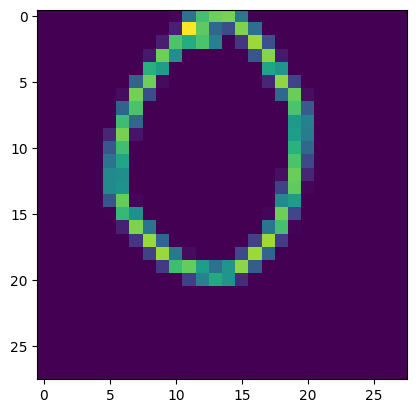

In [18]:
for img_arr, label in labeled_ds.take(1):
    plt.imshow(img_arr)
    print(label.numpy())

In [19]:
# Evaluate using MNIST
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nEvaluation on MNIST:")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Evaluate using custom data
loss, accuracy = model.evaluate(labeled_ds.batch(32), verbose=0)
print(f"\nEvaluation on own data:")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")



Evaluation on MNIST:
Loss: 0.0288
Accuracy: 0.9908

Evaluation on own data:
Loss: 2.6125
Accuracy: 0.5582


## Retrain last layers

In [20]:
print("Number of layers in the base model: ", len(model.layers))

Number of layers in the base model:  26


In [21]:
# Fine-tune after this layer
fine_tune_at = 10

# Freeze the previous layers
for layer in model.layers[:fine_tune_at]:
  layer.trainable = False

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
train_ds_batch = train_ds.batch(32)
val_ds_batch = val_ds.batch(32)

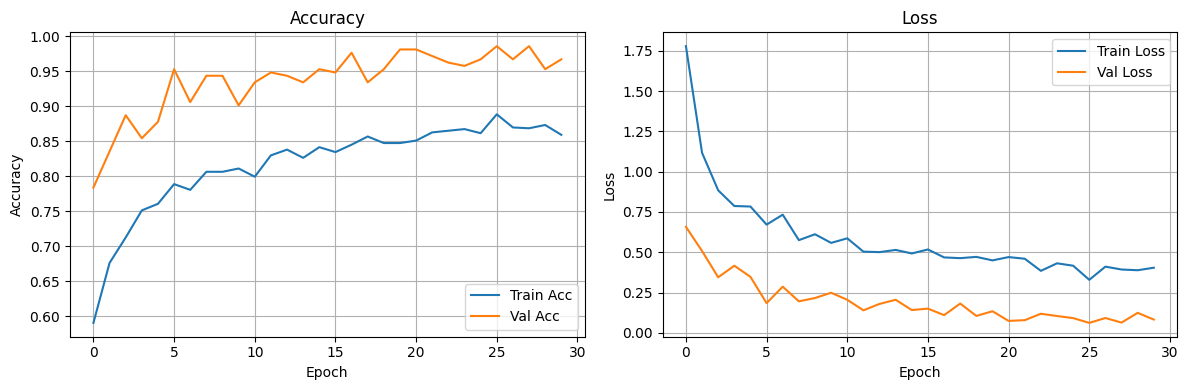

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8581 - loss: 0.3902 - val_accuracy: 0.9671 - val_loss: 0.0820


In [24]:
checkpoint = ModelCheckpoint("best_model_fine_tuned.keras", save_best_only=True, monitor="val_loss")
model.fit(train_ds_batch, validation_data=val_ds_batch, epochs=30, batch_size=16, callbacks=[checkpoint, LivePlot()])

In [25]:
model = tf.keras.models.load_model("best_model_fine_tuned.keras")

## Evaluate fine-tuned model

In [33]:
# Evaluate using MNIST
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nEvaluation on MNIST:")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Evaluate using custom data
loss, accuracy = model.evaluate(val_ds_batch, verbose=0)
print(f"\nEvaluation on own data:")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Evaluation on MNIST:
Loss: 0.3195
Accuracy: 0.8983

Evaluation on own data:
Loss: 0.0653
Accuracy: 0.9859


In [32]:
# on training set
for i in range(10):
    print(f"{i}:")
    result = model.evaluate(
        train_ds
        .filter(lambda img, lab: tf.equal(lab, i))
        .batch(1),
        verbose=0
    )
    print(f"  Loss: {result[0]:.4f} | Accuracy: {result[1]:.4f}\n")


0:
  Loss: 0.0554 | Accuracy: 0.9610

1:
  Loss: 0.0475 | Accuracy: 1.0000

2:
  Loss: 0.0720 | Accuracy: 0.9765

3:
  Loss: 0.0564 | Accuracy: 1.0000

4:
  Loss: 0.1262 | Accuracy: 0.9865

5:
  Loss: 0.0305 | Accuracy: 1.0000

6:
  Loss: 0.1049 | Accuracy: 0.9688

7:
  Loss: 0.1162 | Accuracy: 0.9583

8:
  Loss: 0.0551 | Accuracy: 0.9891

9:
  Loss: 0.1141 | Accuracy: 0.9533



In [34]:
# on validation set
for i in range(10):
    print(f"{i}:")
    result = model.evaluate(
        val_ds
        .filter(lambda img, lab: tf.equal(lab, i))
        .batch(1),
        verbose=0
    )
    print(f"  Loss: {result[0]:.4f} | Accuracy: {result[1]:.4f}\n")

0:
  Loss: 0.0050 | Accuracy: 1.0000

1:


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


  Loss: 0.1120 | Accuracy: 1.0000

2:
  Loss: 0.0412 | Accuracy: 1.0000

3:
  Loss: 0.0539 | Accuracy: 1.0000

4:
  Loss: 0.5385 | Accuracy: 0.9167

5:
  Loss: 0.0838 | Accuracy: 1.0000

6:
  Loss: 0.1259 | Accuracy: 1.0000

7:
  Loss: 0.0365 | Accuracy: 1.0000

8:
  Loss: 0.1328 | Accuracy: 0.9600

9:
  Loss: 0.1643 | Accuracy: 0.9565



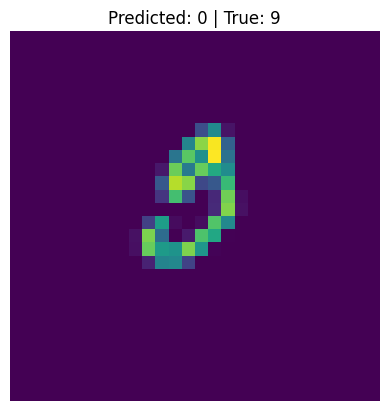

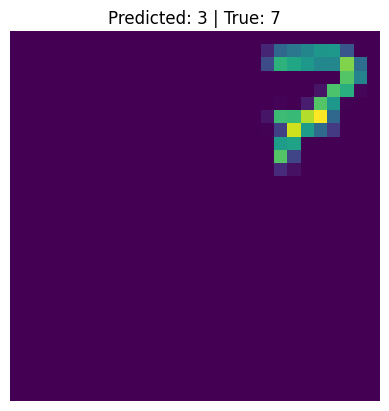

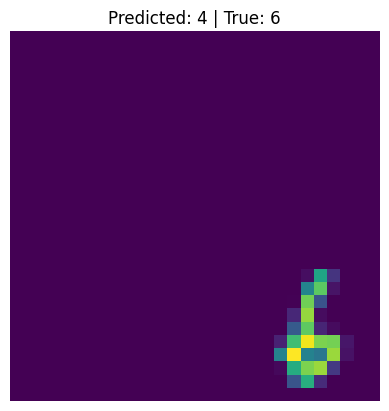

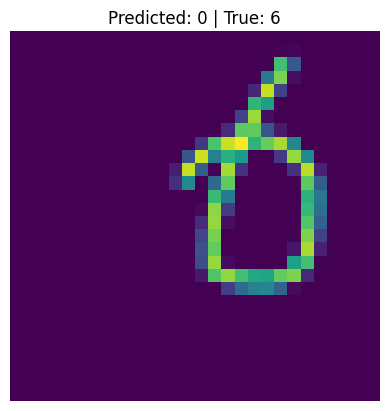

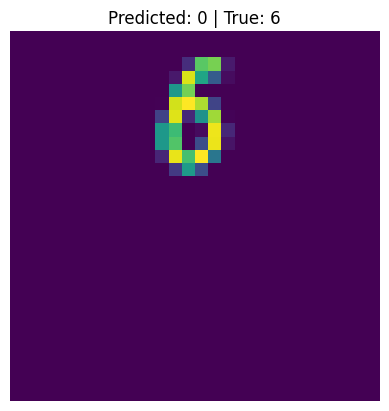

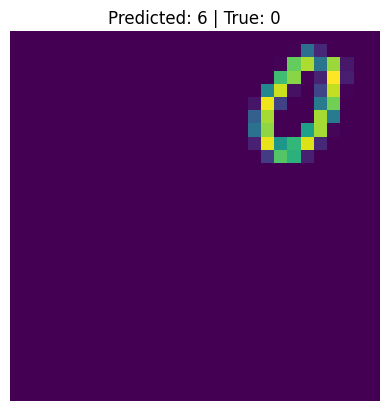

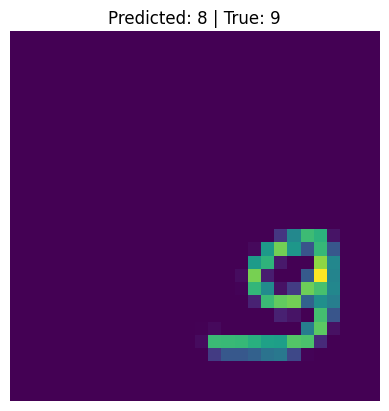

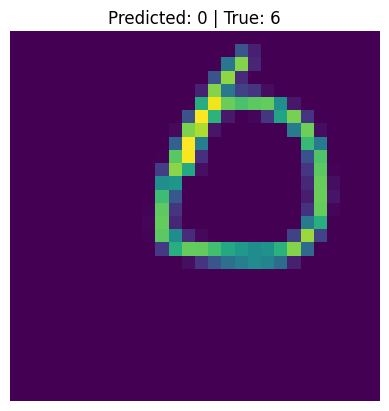

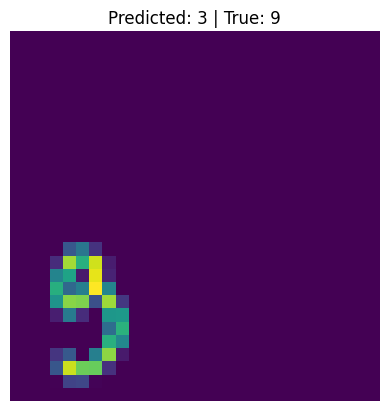

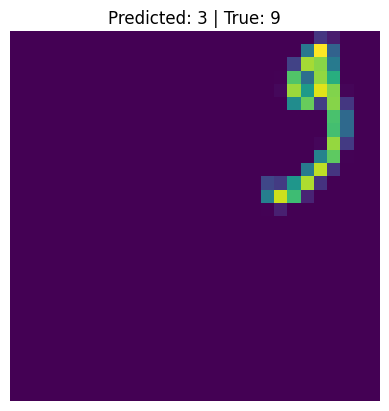

In [29]:
max_to_show = 10
shown = 0

for img_arr, label in labeled_ds.as_numpy_iterator():
    if shown >= max_to_show:
        break

    pred_label = np.argmax(model.predict(img_arr.reshape((1, 28, 28, 1)), verbose=0))
    true_label = label

    if pred_label != true_label:
        plt.imshow(img_arr)
        plt.title(f"Predicted: {pred_label} | True: {true_label}")
        plt.axis('off')
        plt.show()
        shown += 1
